# **Assignment 1**

Omni Manwani - 202211060

## **Installing and Loading necessary libraries**

In [4]:
install.packages("treemap")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("tidyr")
install.packages("ggdendro")
install.packages("reshape2")
install.packages("viridis")
install.packages("tibbles")
install.packages("RColorBrewer")
# Omni Manwani - 202211060

Loading required package: treemap

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘treemap’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridBase’, ‘igraph’


Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: ggdendro

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ggdendro’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: reshape2

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logica

In [5]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(treemap)
library(ggdendro)
library(reshape2)
library(viridis)
library(tibble)
library(RColorBrewer)
# Omni Manwani - 202211060


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Loading required package: viridisLite



## **Reading Dataset [Monthly Monthly Mean Dataset](https://www.data.gov.in/resource/monthly-seasonal-and-annual-maximum-temperature-1901-2019)**



In [9]:
# Read the data
temperature_data_full <- read.csv("Monthly_Mean_Temp_IMD-2901_to_2019_0.csv")

# Month-wise Data
temperature_data_monthly <- temperature_data_full %>%
  select(YEAR, JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, DEC)

df_long_monthly <- melt(temperature_data_monthly,
                       id.vars = "YEAR",
                       variable.name = "Month",
                       value.name = "Temperature")

df_long_monthly$Month <- factor(df_long_monthly$Month,
                              levels = c("JAN", "FEB", "MAR", "APR", "MAY", "JUN",
                                       "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"))

# Seasonal data
temperature_data_seasonal <- temperature_data_full

# Omni Manwani - 202211060

## **Utilizing Different charts to present Stats of Dataset**


1.   Line Chart
2.   Bar Chart
3.   Pie Chart
4.   Histogram
5.   Bubble Chart
6.   Box Plot
7.   Tree Map
8.   Dendogram
9.   Scatter Plot
10.  Heat Map





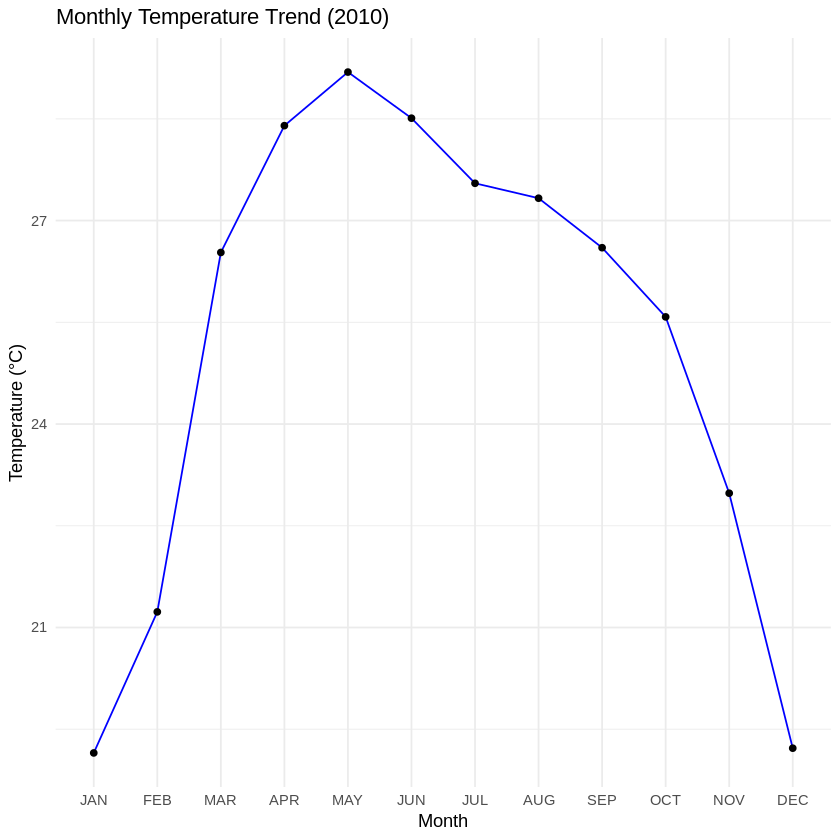

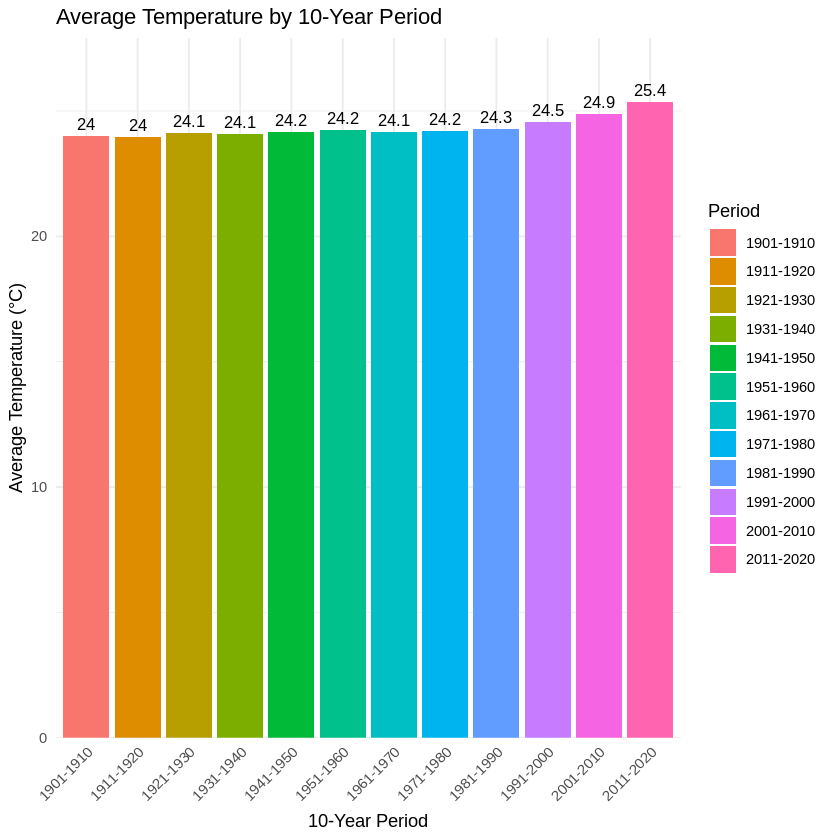

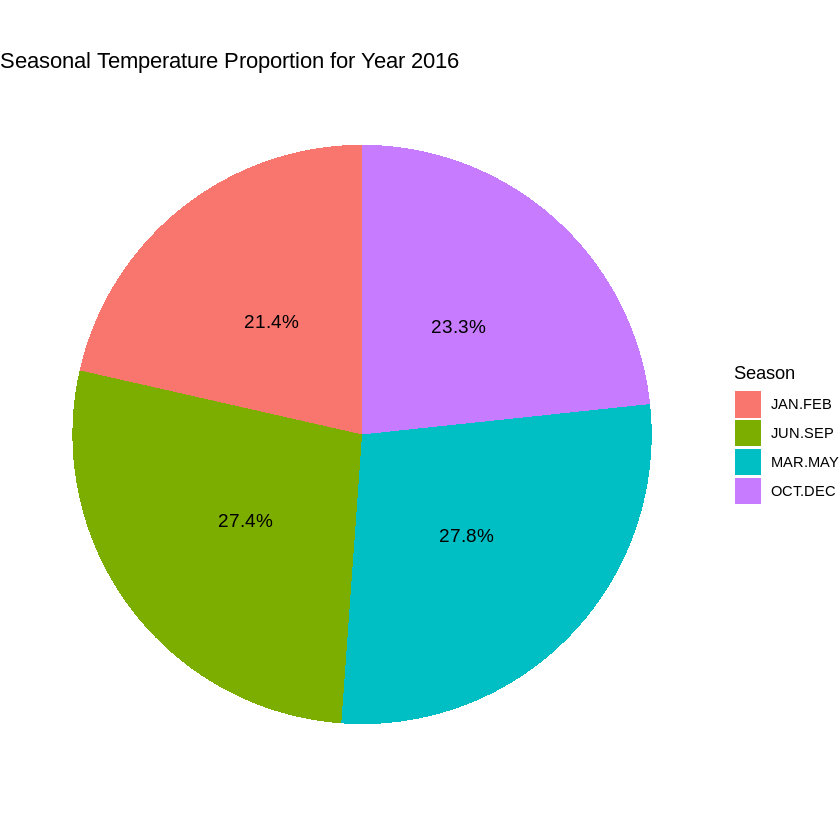

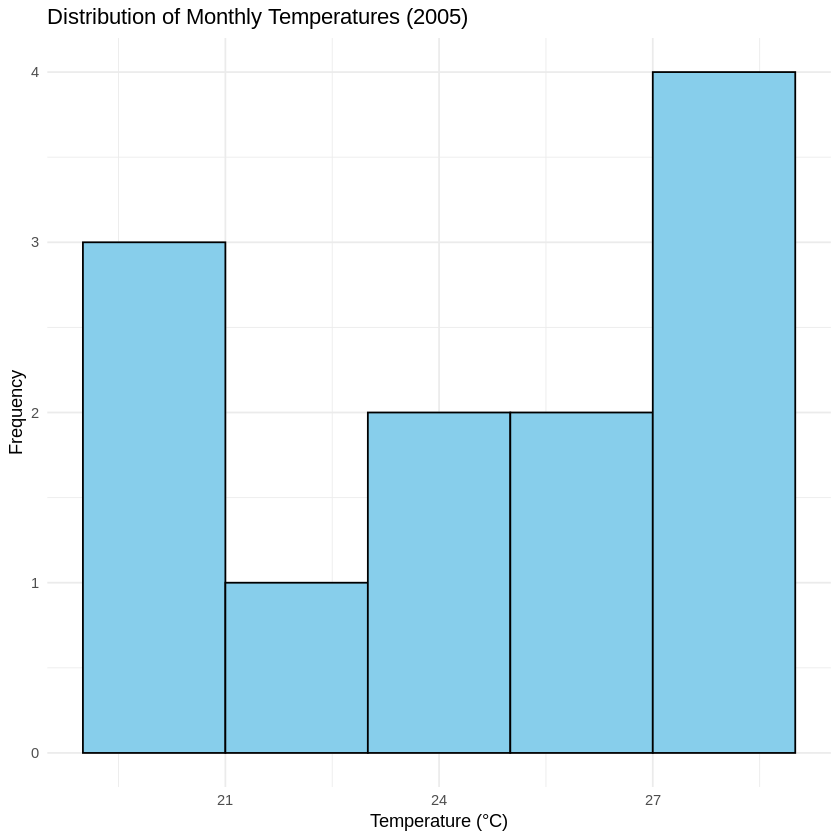

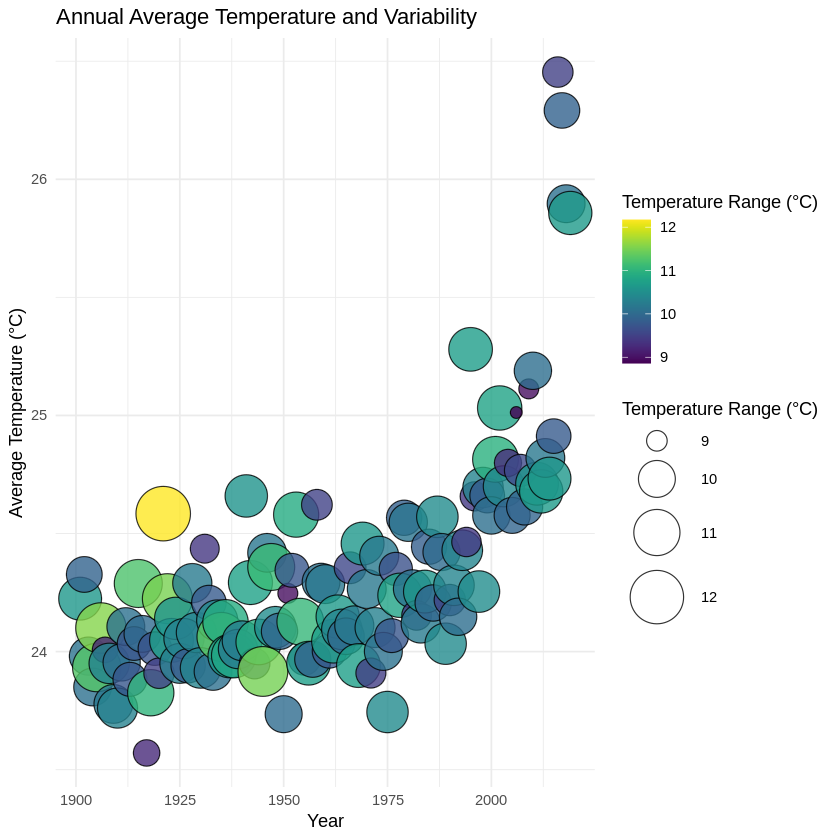

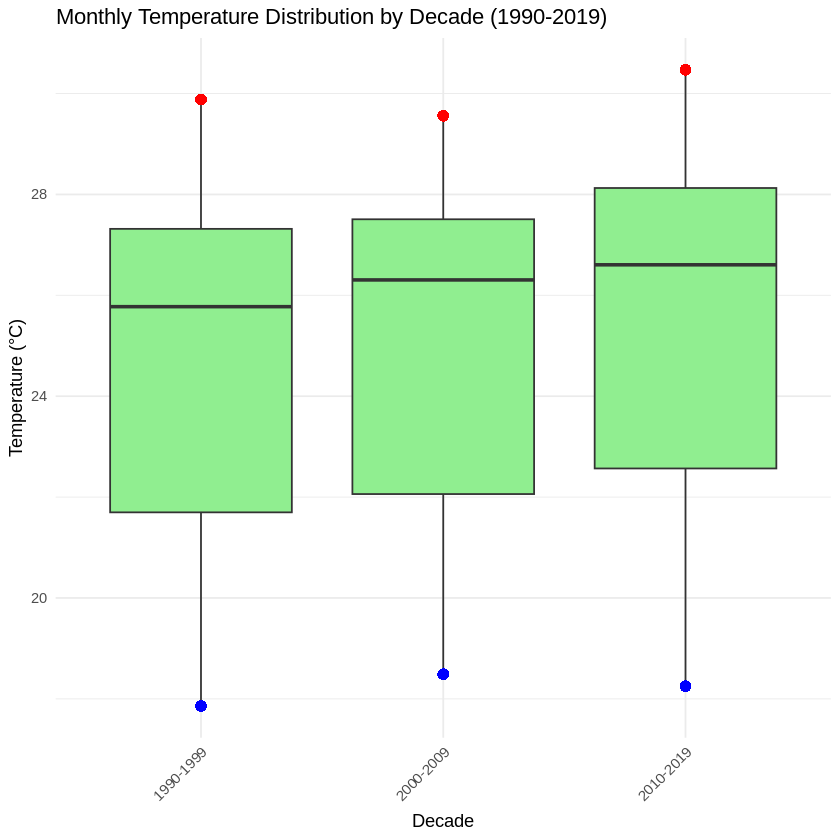

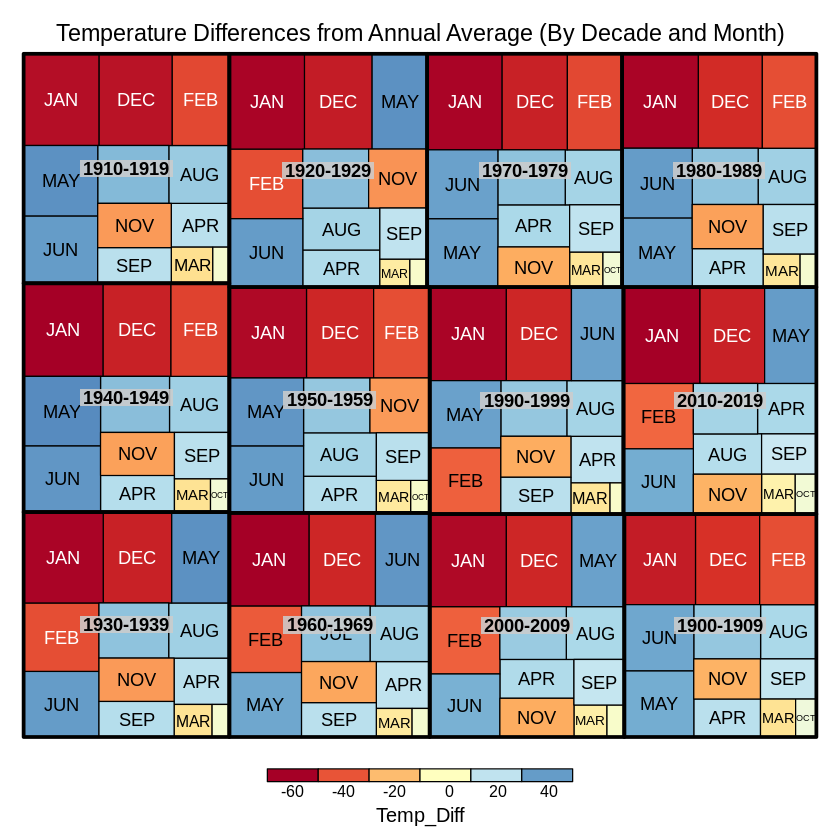

`geom_smooth()` using formula = 'y ~ x'


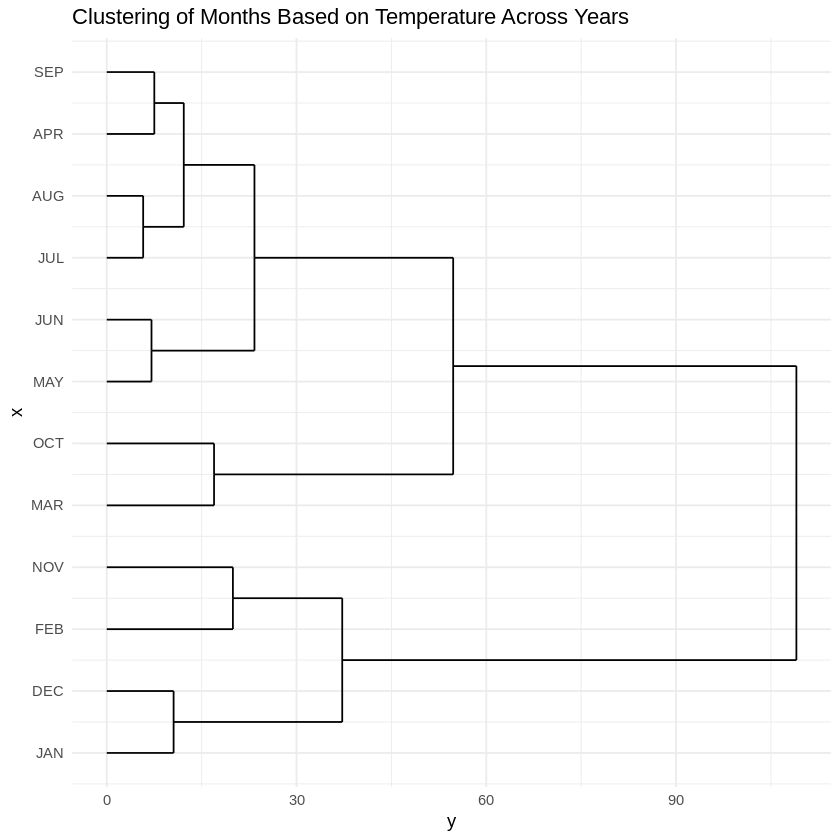

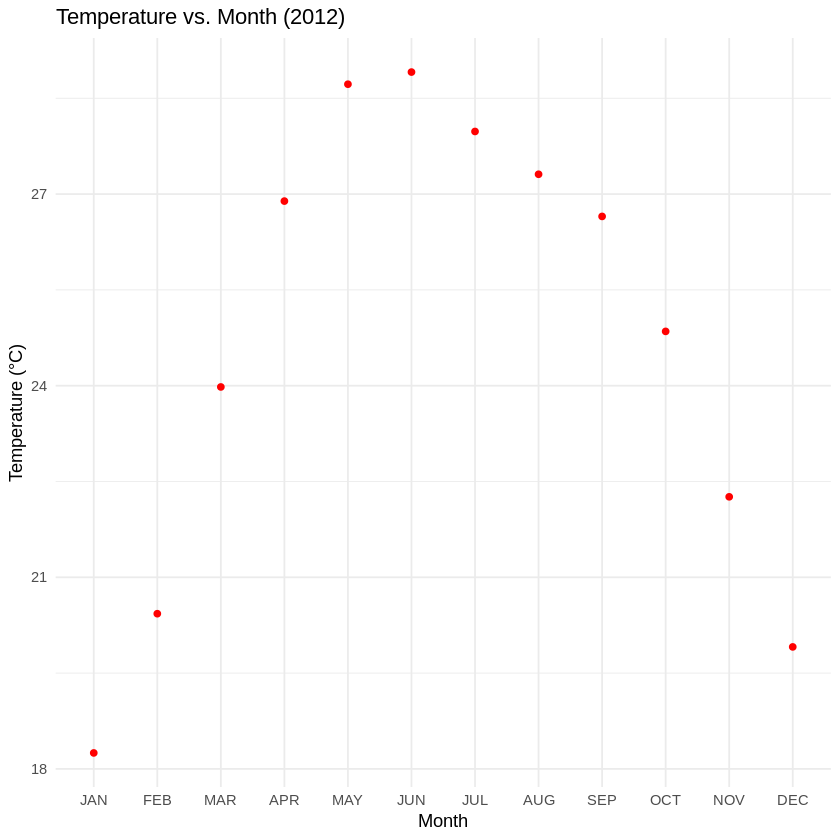

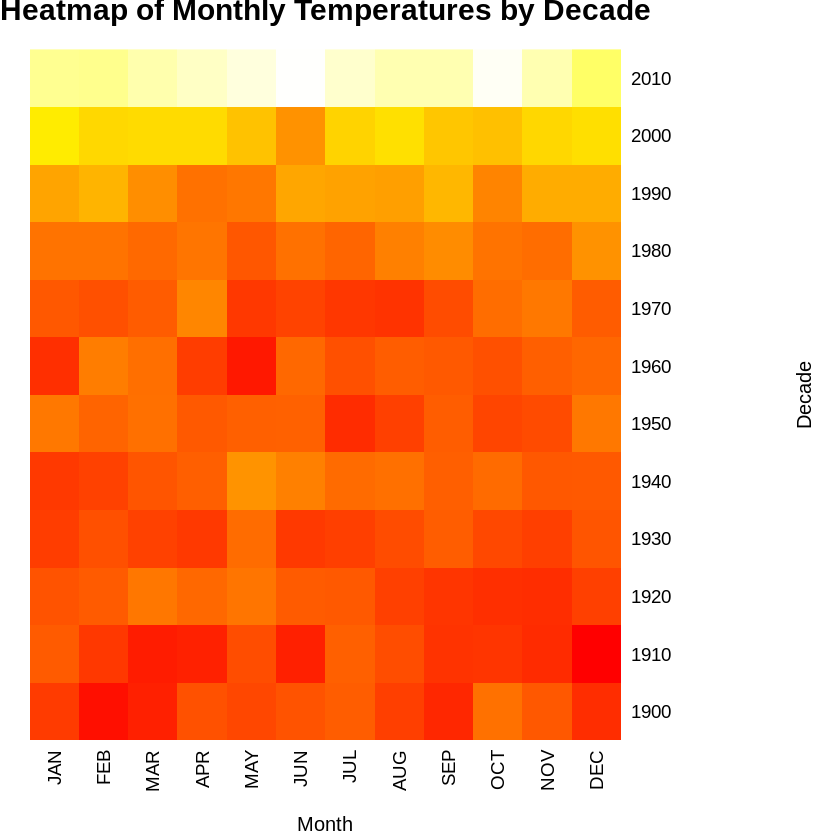

In [8]:
# 1. Line Chart: Monthly Temperature Trend for a Specific Year
data_2010 <- filter(df_long_monthly, YEAR == 2010)

ggplot(data_2010, aes(x = Month, y = Temperature, group = 1)) +
  geom_line(color = 'blue') +
  geom_point() +
  labs(title = 'Monthly Temperature Trend (2010)',
       x = 'Month',
       y = 'Temperature (°C)') +
  theme_minimal()

# 2. Bar Chart: Average Temperature by Year
df_long_monthly <- df_long_monthly %>%
  mutate(Period = paste0(
    floor((YEAR - min(YEAR)) / 10) * 10 + min(YEAR),
    "-",
    floor((YEAR - min(YEAR)) / 10) * 10 + min(YEAR) + 9
  ))

# Calculate average temperature for each 10-year period
avg_temp_10yr <- df_long_monthly %>%
  group_by(Period) %>%
  summarize(Average_Temp = mean(Temperature, na.rm = TRUE))

# Plot the bar chart using 10-year averages
ggplot(avg_temp_10yr, aes(x = Period, y = Average_Temp, fill = Period)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = round(Average_Temp, 1)), vjust = -0.5, size = 3.5) +
  labs(title = 'Average Temperature by 10-Year Period',
       x = '10-Year Period',
       y = 'Average Temperature (°C)') +
  scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 3. Pie Chart: Maximum Temperature Year Seasonal Temperature Proportion
max_temp_year <- temperature_data_seasonal %>%
  slice_max(ANNUAL, n = 1)

max_temp_seasons <- max_temp_year %>%
  select(YEAR, `JAN.FEB`, `MAR.MAY`, `JUN.SEP`, `OCT.DEC`) %>%
  pivot_longer(cols = c(`JAN.FEB`, `MAR.MAY`, `JUN.SEP`, `OCT.DEC`),
               names_to = "Season", values_to = "Temperature") %>%
  mutate(Percentage = Temperature / sum(Temperature) * 100)

ggplot(max_temp_seasons, aes(x = "", y = Temperature, fill = Season)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  geom_text(aes(label = paste0(round(Percentage, 1), "%")),
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = paste("Seasonal Temperature Proportion for Year", max_temp_year$YEAR),
       x = NULL, y = NULL) +
  theme_void()


# 4. Histogram: Distribution of Monthly Temperatures (2005)
data_2005 <- filter(df_long_monthly, YEAR == 2005)

ggplot(data_2005, aes(x = Temperature)) +
  geom_histogram(binwidth = 2, fill = 'skyblue', color = 'black') +
  labs(title = 'Distribution of Monthly Temperatures (2005)',
       x = 'Temperature (°C)',
       y = 'Frequency') +
  theme_minimal()

# 5. Bubble Chart: Temperature by Year and Month
annual_summary <- df_long_monthly %>%
  group_by(YEAR) %>%
  summarize(avg_temp = mean(Temperature, na.rm = TRUE),
            temp_range = max(Temperature, na.rm = TRUE) - min(Temperature, na.rm = TRUE))

ggplot(annual_summary, aes(x = YEAR, y = avg_temp, size = temp_range, fill = temp_range)) +
  geom_point(shape = 21, color = "black", alpha = 0.8) +
  scale_size(range = c(3, 15)) +
  scale_fill_viridis() +
  labs(title = "Annual Average Temperature and Variability",
       x = "Year",
       y = "Average Temperature (°C)",
       size = "Temperature Range (°C)",
       fill = "Temperature Range (°C)") +
  theme_minimal()

# 6. Box Plot: Monthly Temperature Distribution
data_decades <- df_long_monthly %>%
  filter(YEAR >= 1990 & YEAR <= 2019)

data_decades$Decade <- paste(floor(data_decades$YEAR / 10) * 10,
                           floor(data_decades$YEAR / 10) * 10 + 9,
                           sep = "-")

ggplot(data_decades, aes(x = factor(Decade), y = Temperature)) +
  geom_boxplot(fill = 'lightgreen') +
  geom_point(data = data_decades %>%
               group_by(Decade) %>%
               summarise(min_temp = min(Temperature),
                        max_temp = max(Temperature)),
             aes(x = factor(Decade), y = min_temp),
             color = 'blue', size = 3, shape = 16) +
  geom_point(data = data_decades %>%
               group_by(Decade) %>%
               summarise(min_temp = min(Temperature),
                        max_temp = max(Temperature)),
             aes(x = factor(Decade), y = max_temp),
             color = 'red', size = 3, shape = 16) +
  labs(title = 'Monthly Temperature Distribution by Decade (1990-2019)',
       x = 'Decade',
       y = 'Temperature (°C)') +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 7. Tree Map
df_long_monthly <- df_long_monthly %>%
  mutate(Decade = paste0(floor(YEAR / 10) * 10, "-", floor(YEAR / 10) * 10 + 9))

avg_temp_decade <- df_long_monthly %>%
  group_by(Decade) %>%
  summarise(Annual_Avg_Temp = mean(Temperature, na.rm = TRUE))

temp_diff_decade <- df_long_monthly %>%
  left_join(avg_temp_decade, by = 'Decade') %>%
  mutate(Temp_Diff = Temperature - Annual_Avg_Temp,
         Abs_Temp_Diff = abs(Temp_Diff))

treemap(temp_diff_decade,
        index = c('Decade', 'Month'),
        vSize = 'Abs_Temp_Diff',
        vColor = 'Temp_Diff',
        type = 'value',
        palette = 'RdYlBu',
        title = 'Temperature Differences from Annual Average (By Decade and Month)')

# 8. Dendrogram
df_cleaned <- df_long_monthly %>%
  filter(!is.na(Temperature))

df_summary <- df_cleaned %>%
  group_by(YEAR, Month) %>%
  summarise(Temperature = mean(Temperature, na.rm = TRUE), .groups = 'drop')

temp_wide <- df_summary %>%
  select(YEAR, Month, Temperature) %>%
  spread(Month, Temperature)

temp_wide_clean <- temp_wide %>%
  drop_na()

temp_wide_clean <- temp_wide_clean %>%
  column_to_rownames(var = "YEAR")

dist_matrix <- dist(t(temp_wide_clean))
hc <- hclust(dist_matrix)

ggdendrogram(hc, rotate = TRUE, size = 2) +
  labs(title = 'Clustering of Months Based on Temperature Across Years') +
  theme_minimal()

# 9. Scatter Plot: Temperature vs. Month (2012)
data_2012 <- filter(df_long_monthly, YEAR == 2012)

ggplot(data_2012, aes(x = Month, y = Temperature)) +
  geom_point(color = 'red') +
  geom_smooth(method = 'loess', se = FALSE, color = 'blue') +
  labs(title = 'Temperature vs. Month (2012)',
       x = 'Month',
       y = 'Temperature (°C)') +
  theme_minimal()

# 10. Heatmap
df_long_monthly <- df_long_monthly %>%
  mutate(Decade = floor(YEAR / 10) * 10) %>%
  group_by(Decade, Month) %>%
  summarise(Temperature = mean(Temperature, na.rm = TRUE), .groups = 'drop')

heatmap_data <- df_long_monthly %>%
  select(Decade, Month, Temperature) %>%
  spread(key = Month, value = Temperature)

heatmap_data <- na.omit(heatmap_data)
heatmap_data <- as.data.frame(heatmap_data)
rownames(heatmap_data) <- heatmap_data$Decade
heatmap_data <- heatmap_data[, -1]
heatmap_matrix <- as.matrix(heatmap_data)

heatmap(heatmap_matrix,
        Rowv = NA,
        Colv = NA,
        col = heat.colors(256),
        scale = "column",
        margins = c(5, 10),
        xlab = "Month",
        ylab = "Decade",
        main = "Heatmap of Monthly Temperatures by Decade")